### Fetching More Movies

In [243]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook
import imageio
import glob

In [196]:
from bs4 import BeautifulSoup
from urllib2 import urlopen, HTTPError, URLError
from urlparse import urlparse, urljoin
import os.path, errno
import shutil
import subprocess32 as subprocess
from concurrent.futures import *
from itertools import islice

In [197]:
cd ~/MEGA/eScienceWork/projects/OOIVideos

/home/val/MEGA/eScienceWork/projects/OOIVideos


In [198]:
import sys
# sys.path.append('~/MEGA/eScienceWork/projects/OOIVideos')

In [199]:
import fetchmovies as fm

In [200]:
reload(fm)

<module 'fetchmovies' from 'fetchmovies.py'>

In [18]:
import ssl
context = ssl._create_unverified_context()
response = urlopen(url_archive,context = context)

In [8]:
import imp
import fetchmovies as fm
reload(fm)

<module 'fetchmovies' from 'fetchmovies.pyc'>

In [37]:
download(url_archive,'test.mp4')

True

In [57]:
url = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016"


for url in fm.moviecrawl(url):
    local_file_name = getlocalpath(url)
    print(local_file_name)
    if not os.path.exists(local_file_name):
        download(url)
        print(url)
        # uploadtoGoogle(local_file_name)

In [98]:
# downloading files without a catalog

https://rawdata.oceanobservatories.orgCAMHDA301-20160504T000000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T030000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T060000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T090000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T120000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T150000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T180000Z.mp4
https://rawdata.oceanobservatories.orgCAMHDA301-20160504T210000Z.mp4


In [103]:
# create a list of urls for the first day of each month

In [205]:
base_url = 'https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/'

'https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/'

We will extract the first video in every month in order to look at phenomena across time.

In [209]:
# create manually the list of dates (it is not automatic since some months are missing (2015/11,2016/02))
dates = ['2015/12/01/','2016/01/01/','2016/03/01/','2016/04/01/','2016/05/01/']

In [227]:
dates = ['2015/12/15/','2016/01/15/','2016/03/15/','2016/04/15/']+\
      ['2015/12/07/','2016/01/07/','2016/03/07/','2016/04/07/']+\
    ['2015/12/30/','2016/01/30/','2016/03/30/','2016/04/30/']
    

In [228]:
# path to store all videos (store on my sdcard)
path = '/media/0403-0201/work/monthly_videos/'


for date in dates[1:]:
    # day_url = base_url+year+'{:02.0f}'.format(i+1)+'/01/'
    day_url = base_url+date

    moviename = fm.moviecrawl_html(day_url)[0]
    
    print('Reading file '+day_url+moviename)
    
    download(day_url+moviename,path+moviename)   

    #uploadtoGoogle(local_file_name)

Reading file https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/01/15/CAMHDA301-20160115T010000Z.mp4
Reading file https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/03/15/CAMHDA301-20160315T000000Z.mp4
Reading file https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/04/15/CAMHDA301-20160415T000000Z.mp4
Reading file https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/07/CAMHDA301-20151207T000000Z.mp4


HTTPError: HTTP Error 404: Not Found

In [229]:
# display first of month frames:

In [249]:
dates = ['20151201','20160101','20160301','20160401','20160501']

In [231]:
from skimage import io

<IPython.core.display.Javascript object>


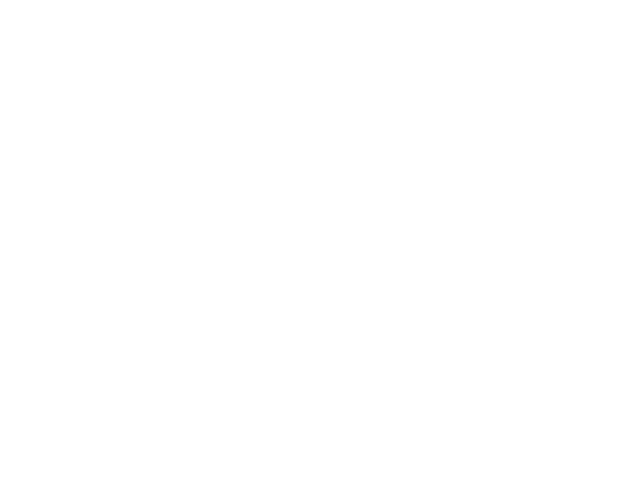

IOError: cannot identify image file <open file u'/media/0403-0201/work/monthly_videos/CAMHDA301-20151207T000000Z.mp4', mode 'rb' at 0x7f4c142fd390>

In [236]:
# path to store all videos (store on my sdcard)
path = '/media/0403-0201/work/monthly_videos/'
fig = plt.figure()
fig.show()
fig.canvas.draw()

for date in dates:
    im = io.imread(path+moviename)
    plt.imshow(im)
    plt.show()
    plt.canvas.draw()

In [248]:
cd /media/0403-0201/work/monthly_videos/

/media/0403-0201/work/monthly_videos


<IPython.core.display.Javascript object>


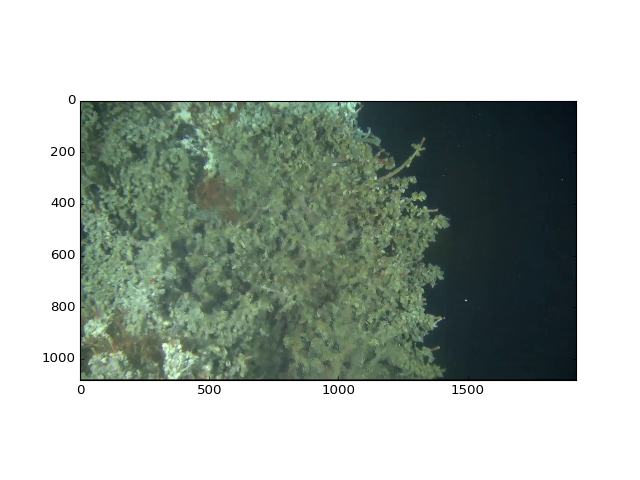

In [251]:
plt.figure()
fig = plt.gcf()
fig.show()
fig.canvas.draw()

path = '/media/0403-0201/work/monthly_videos/'


frames_bdry = []
for date in dates:
    filename = path+date
    for file in glob.glob('*.*'):
        if date in file:

            vid = imageio.get_reader(file,  'ffmpeg')
            # nums = [2760,8160,13200]
            num = 13200
            #for num in nums:
            image = vid.get_data(num)
            frames_bdry.append(image)

            plt.imshow(image)
            fig.canvas.draw()

In [247]:
print glob.glob('*.*')

['test.mp4', 'fetchmovies.pyc', 'fetchmovies.py']
